In [4]:
from pulser import Pulse, Sequence, Register
from pulser.devices import MockDevice
from pulser import waveforms
from pulser_simulation import QutipEmulator
import qutip
import matplotlib.pyplot as plt
import numpy as np

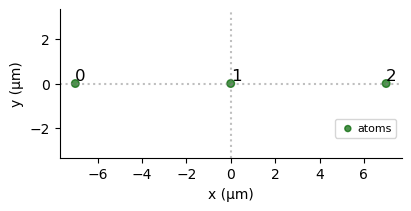

In [2]:
coords = [[-7, 0], [0,0], [7,0]]
reg = Register.from_coordinates(coords)
reg.draw()

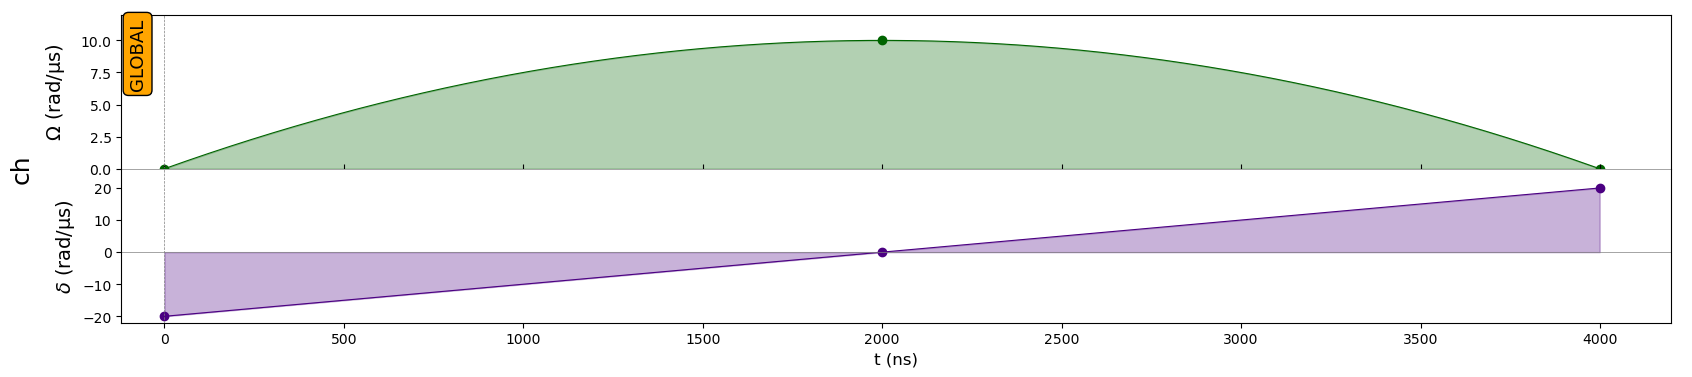

In [11]:
seq = Sequence(reg, MockDevice)

seq.declare_channel('ch', 'rydberg_global')

amplitude = waveforms.InterpolatedWaveform(4000, [0,10,0])
detuning = waveforms.InterpolatedWaveform(4000, [-20,0,20])
pulse = Pulse(amplitude, detuning, 0)

seq.add(pulse, 'ch')
seq.draw()

In [13]:
sim = QutipEmulator.from_sequence(seq)

result = sim.run()

In [ ]:
# a measurement of the final state will give the MIS of the graph with
# almost 100% probability
result.sample_final_state(1000)

Counter({'101': 1000})

In [15]:
def MIS_solver(reg, T):
    seq = Sequence(reg, MockDevice)
    seq.declare_channel('ch', 'rydberg_global')
    amplitude = waveforms.InterpolatedWaveform(T, [0,10,0])
    detuning = waveforms.InterpolatedWaveform(T, [-20,0,20])
    pulse = Pulse(amplitude, detuning, 0)
    seq.add(pulse, 'ch')
    sim = QutipEmulator.from_sequence(seq)
    result = sim.run()
    return result.sample_final_state(1000)

In [ ]:
# effect of adiabaticity (slow evolution) on the final sampling
for T in [100, 200, 1000, 4000]:
    print(MIS_solver(reg, T))

Counter({'000': 721, '010': 96, '100': 94, '001': 73, '011': 7, '101': 6, '110': 3})
Counter({'010': 272, '000': 219, '001': 186, '100': 179, '101': 118, '011': 13, '110': 13})
Counter({'101': 874, '010': 119, '100': 3, '000': 2, '001': 2})
Counter({'101': 998, '001': 1, '010': 1})


In [17]:
def MIS_solver_exp_val(reg, T):
    seq = Sequence(reg, MockDevice)
    seq.declare_channel('ch', 'rydberg_global')
    amplitude = waveforms.InterpolatedWaveform(T, [0,10,0])
    detuning = waveforms.InterpolatedWaveform(T, [-20,0,20])
    pulse = Pulse(amplitude, detuning, 0)
    seq.add(pulse, 'ch')
    sim = QutipEmulator.from_sequence(seq)
    result = sim.run()
    proj = qutip.ket('udu').proj()
    return result.expect([proj])[0]

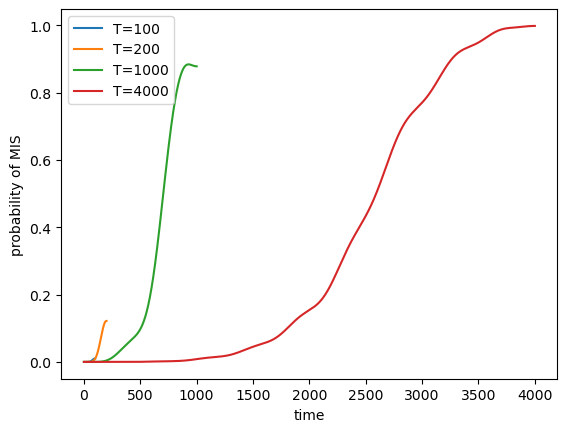

In [20]:
# probability of finding the MIS as a function of time with different pulse lengths
for T in [100, 200, 1000, 4000]:
    plt.plot(MIS_solver_exp_val(reg, T), label=f"T={T}")
plt.xlabel('time')
plt.ylabel("probability of MIS")
plt.legend()

In [ ]:
# Exercise: solve the MIS on the following graph

V = [1,2,3,4,5,6]
E = [(1,2), (2,3), (3,4), (4,5), (4,6)]

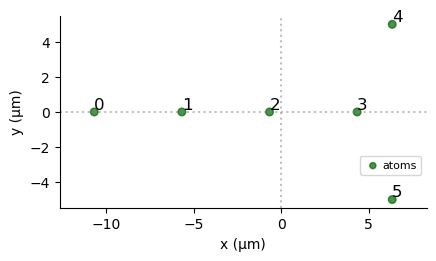

In [24]:
coords = np.array([[0,0], [5,0], [10, 0], [15,0], [17,5], [17,-5]])
reg = Register.from_coordinates(coords)
reg.draw()

In [ ]:
# check the order of magnitude of the interaction strength between connected vertice and non connected vertices
C = 5420158
int_01 = C/5**6
int_02 = C/10**6
int_34 = C/(np.linalg.norm(coords[3]-coords[4]))**6

print(int_01, int_02, int_34)

346.890112 5.420158 222.23781212841862


In [ ]:
# set the final detuning as half the connected vertices interaction strength
final_det = 350/2

In [30]:
seq = Sequence(reg, MockDevice)
seq.declare_channel('ch', 'rydberg_global')
amplitude = waveforms.InterpolatedWaveform(10000, [0,10,0])
detuning = waveforms.InterpolatedWaveform(10000, [-20,0,final_det])
pulse = Pulse(amplitude, detuning, 0)
seq.add(pulse, 'ch')
sim = QutipEmulator.from_sequence(seq)
result = sim.run()
result.sample_final_state(1000)

Counter({'101011': 986, '100011': 13, '010011': 1})